# Imports

In [50]:
import folium
import os
import pandas as pd
import lxml
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import glob

In [2]:
# import zipfile as zf
path = "data/RMMS"
# files = zf.ZipFile("data/RMMS.zip", 'r')
# files.extractall('data')
# files.close()

In [3]:
def read_htm_file(folder_path, file_name):
    # Construct the full path to the HTM file
    file_path = os.path.join(folder_path, file_name)
    
    # Read the HTM file and extract components of the file
    components = pd.read_html(file_path)
    
    # Assuming the table we want is the fifth one, access the fourth index
    desired_table = components[4]
    
    # Drop the title row - not necessary
    desired_table = desired_table.drop(index=0)
    
    # Reset the index after dropping the title row
    desired_table = desired_table.reset_index(drop=True)
    
    # Now return with the desired_table DataFrame
    return desired_table

In [4]:
# Read first htm from the folder
roadtest_df = read_htm_file("data/RMMS", "N1.traffic.htm")
roadtest_df.head(3)

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,Link no,Name,Start location,Start location,Start location,End location,End location,End location,Length,Traffic Data,...,Traffic Data,Traffic Data,Traffic Data,Traffic Data,Traffic Data,Traffic Data,Total,Total,Total,Traffic
1,NaN,NaN,LRP,Offset,Chainage,LRP,Offset,Chainage,(Km),Heavy Truck,...,Car,Auto Rickshaw,Motor Cycle,Bi-Cycle,Cycle Rickshaw,Cart,Motorized,Non Motorized,Total AADT,(AADT)
2,N1-1L,Jatrabari - Int.with Z1101 (Left) (Left),LRPS,0,0,LRPS,822,0.822,0.822,402.0,...,1851.0,2980.0,398.0,232.0,889.0,0.0,18236.0,1121.0,19357.0,19357.0


In [5]:
def create_multi_index(df):
    desired_table = df
    # Get the values of the first two rows
    first_row_values = desired_table.iloc[0].values
    second_row_values = desired_table.iloc[1].values

    # Combine the values from the first two rows into column names, avoiding concatenation if the second value is NaN
    column_names = []
    for first, second in zip(first_row_values, second_row_values):
        if isinstance(second, str) and not pd.isna(second):
            column_names.append(f'{first} - {second}')
        else:
            column_names.append(first)
    
    # Remove the first two rows
    desired_table = desired_table.drop([0, 1])
    
    # Reset the index after dropping these rows
    desired_table = desired_table.reset_index(drop=True)
    
    # Check if the number of columns matches the length of column names
    if len(desired_table.columns) == len(column_names):
        # Set the combined column names to the DataFrame
        desired_table.columns = column_names
    else:
        raise ValueError("Length of column names does not match the number of columns in the DataFrame.")
    
    # Return result
    return desired_table

In [6]:
lukasidf = create_multi_index(roadtest_df)
lukasidf.head(3)

,Link no,Name,Start location - LRP,Start location - Offset,Start location - Chainage,End location - LRP,End location - Offset,End location - Chainage,Length - (Km),Traffic Data - Heavy Truck,...,Traffic Data - Car,Traffic Data - Auto Rickshaw,Traffic Data - Motor Cycle,Traffic Data - Bi-Cycle,Traffic Data - Cycle Rickshaw,Traffic Data - Cart,Total - Motorized,Total - Non Motorized,Total - Total AADT,Traffic - (AADT)
0,N1-1L,Jatrabari - Int.with Z1101 (Left) (Left),LRPS,0,0,LRPS,822,0.822,0.822,402.0,...,1851.0,2980.0,398.0,232.0,889.0,0.0,18236.0,1121.0,19357.0,19357.0
1,N1-1R,Jatrabari - Int.with Z1101 (Left) (Right),LRPS,0,0,LRPS,822,0.822,0.822,660.0,...,2608.0,2508.0,436.0,213.0,1088.0,0.0,20236.0,1301.0,21537.0,21537.0
2,N1-2L,Int.with Z1101 - Signboard (Left) R111 (Left),LRPS,822,0.822,LRPS,4175,4.175,3.353,660.0,...,2608.0,2508.0,436.0,213.0,1088.0,0.0,20236.0,1301.0,21537.0,21537.0


# Creating Roads df

In [7]:
dfs = []

# Loop over all '.traffic' HTML files in the folder
for file_path in glob.glob(f"{path}*/*.traffic.htm"):
    
    # Extract the file name from the file path
    file_name = os.path.basename(file_path)
    
    # Apply the previously defined funtions
    df = read_htm_file(path, file_name)
    df_processed = create_multi_index(df)
    
    # Append the processed DataFrame to the list
    # This append is still alowed right? Because it appends something to a list? Or is that not true?
    dfs.append(df_processed)

rmms_concat = pd.concat(dfs, ignore_index=True)
rmms_concat

,Link no,Name,Start location - LRP,Start location - Offset,Start location - Chainage,End location - LRP,End location - Offset,End location - Chainage,Length - (Km),Traffic Data - Heavy Truck,...,Traffic Data - Car,Traffic Data - Auto Rickshaw,Traffic Data - Motor Cycle,Traffic Data - Bi-Cycle,Traffic Data - Cycle Rickshaw,Traffic Data - Cart,Total - Motorized,Total - Non Motorized,Total - Total AADT,Traffic - (AADT)
0,N1-1L,Jatrabari - Int.with Z1101 (Left) (Left),LRPS,0,0,LRPS,822,0.822,0.822,402.0,...,1851.0,2980.0,398.0,232.0,889.0,0.0,18236.0,1121.0,19357.0,19357.0
1,N1-1R,Jatrabari - Int.with Z1101 (Left) (Right),LRPS,0,0,LRPS,822,0.822,0.822,660.0,...,2608.0,2508.0,436.0,213.0,1088.0,0.0,20236.0,1301.0,21537.0,21537.0
2,N1-2L,Int.with Z1101 - Signboard (Left) R111 (Left),LRPS,822,0.822,LRPS,4175,4.175,3.353,660.0,...,2608.0,2508.0,436.0,213.0,1088.0,0.0,20236.0,1301.0,21537.0,21537.0
3,N1-2R,Int.with Z1101 - Signboard (Left) R111 (Right),LRPS,822,0.822,LRPS,4175,4.175,3.353,402.0,...,1851.0,2980.0,398.0,232.0,889.0,0.0,18236.0,1121.0,19357.0,19357.0
4,N1-3L,Signboard - Shimrail (Left)R110 (Left),LRPS,4175,4.175,LRPS,7181,7.181,3.006,91.0,...,1690.0,2266.0,1087.0,75.0,1198.0,0.0,16288.0,1273.0,17561.0,17561.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,N809-3,Dinerpool (Int.with Z8044)-Veduria Ferryghat,LRP003,2300,5.3,LRP025,675,25.69,20.390,0.0,...,22.0,380.0,596.0,275.0,441.0,0.0,1390.0,716.0,2106.0,2106.0
607,N809-4,Veduria Ferryghat-Parantalukderhat (Int.with R...,LRP025,675,25.69,LRP034,995,35.195,9.505,4.0,...,36.0,270.0,233.0,198.0,204.0,0.0,1153.0,402.0,1555.0,1555.0
608,N809-5,Parantalukderhat (Int.with R890)-Illisha Chata...,LRP034,995,35.195,LRP041,945,42.16,6.965,4.0,...,36.0,270.0,233.0,198.0,204.0,0.0,1153.0,402.0,1555.0,1555.0
609,N809-6,Maju Chowdhury Ghat-Terobaki (Int.with R147),LRP041,945,42.16,LRP066,82,66.177,24.017,0.0,...,56.0,251.0,173.0,177.0,167.0,0.0,905.0,344.0,1249.0,1249.0


# Clean RMMS data

In [8]:
#Remove unnecessary columns, also rename remaining columns
def clean_rmms0(df):
    columns_to_drop = [
    'Start location - LRP',
    'Start location - Offset',
    'End location - LRP',
    'End location - Offset',
    'Traffic Data - Large Bus',
    'Traffic Data - Medium Bus',
    'Traffic Data - Micro Bus',
    'Traffic Data - Utility',
    'Traffic Data - Car',
    'Traffic Data - Auto Rickshaw',
    'Traffic Data - Motor Cycle',
    'Traffic Data - Bi-Cycle',
    'Traffic Data - Cycle Rickshaw',
    'Traffic Data - Cart',
    'Total - Motorized',
    'Total - Non Motorized',
    'Total - Total AADT']
    
    df = df.drop(columns=columns_to_drop, errors='ignore')
    
    column_rename_dict = {
    'Link no': 'Link number',
    'Name': 'Name',
    'Start location - Chainage': 'Chainage start',
    'End location - Chainage': 'Chainage end',
    'Length - (Km)': 'Length Km',
    'Traffic Data - Heavy Truck': 'Heavy truck',
    'Traffic Data - Medium Truck': 'Medium truck',
    'Traffic Data - Small Truck': 'Small truck',
    'Traffic - (AADT)': 'AADT'}
    
    df = df.rename(columns=column_rename_dict)
    return df

#change var type, add column which is a sum of heavy, medium and small truck data
def clean_rmms1(df):
    columns_change_var_type = column_list = ['Chainage start','Chainage end','Length Km','Heavy truck','Medium truck','Small truck','AADT']
    
    for col in columns_change_var_type:  # Select columns from 3rd to 12th
        df[col] = pd.to_numeric(df[col], errors='coerce')
    return df

#Create the extra columns road name and sum of the disicted truck types
def clean_rmms2(df):
    df['Road name'] = df['Link number'].str.split('-').str.get(0)
    df['Sum Truck'] = df['Heavy truck'] + df['Medium truck'] + df['Small truck']
    return df

#aggregate rows which have a duplicate 'Chainage start' value. All non-float columns are aggregated via 'first', all float columns are aggregated
# via sum''. Meaning that 2 datapoints for the same measurement point are added to eachother.
def clean_rmms3(df):
    aggregation_functions = {
    'Link number': 'first',
    'Name': 'first',
    'Chainage start': 'first',
    'Chainage end': 'first',
    'Length Km': 'first',
    'Heavy truck': 'sum',
    'Medium truck': 'sum',
    'Small truck': 'sum',
    'AADT': 'sum',
    'Road name':'first',
    'Sum Truck':'sum' }
    
    aggregated_df = df.groupby(['Road name','Chainage start']).agg(aggregation_functions).reset_index(drop=True)#drop=True, inplace=True)

    return aggregated_df

In [9]:
# rmms1.head(2)

In [10]:
rmms_concat.head(2)

,Link no,Name,Start location - LRP,Start location - Offset,Start location - Chainage,End location - LRP,End location - Offset,End location - Chainage,Length - (Km),Traffic Data - Heavy Truck,...,Traffic Data - Car,Traffic Data - Auto Rickshaw,Traffic Data - Motor Cycle,Traffic Data - Bi-Cycle,Traffic Data - Cycle Rickshaw,Traffic Data - Cart,Total - Motorized,Total - Non Motorized,Total - Total AADT,Traffic - (AADT)
0,N1-1L,Jatrabari - Int.with Z1101 (Left) (Left),LRPS,0,0,LRPS,822,0.822,0.822,402.0,...,1851.0,2980.0,398.0,232.0,889.0,0.0,18236.0,1121.0,19357.0,19357.0
1,N1-1R,Jatrabari - Int.with Z1101 (Left) (Right),LRPS,0,0,LRPS,822,0.822,0.822,660.0,...,2608.0,2508.0,436.0,213.0,1088.0,0.0,20236.0,1301.0,21537.0,21537.0


In [11]:
rmms0= clean_rmms0(rmms_concat)
rmms1= clean_rmms1(rmms0)
rmms2= clean_rmms2(rmms1)
rmms3= clean_rmms3(rmms2)
rmms3

,Link number,Name,Chainage start,Chainage end,Length Km,Heavy truck,Medium truck,Small truck,AADT,Road name,Sum Truck
0,N1-1L,Jatrabari - Int.with Z1101 (Left) (Left),0.000,0.822,0.822,1062.0,11997.0,2701.0,40894.0,N1,15760.0
1,N1-2L,Int.with Z1101 - Signboard (Left) R111 (Left),0.822,4.175,3.353,1062.0,11997.0,2701.0,40894.0,N1,15760.0
2,N1-3L,Signboard - Shimrail (Left)R110 (Left),4.175,7.181,3.006,176.0,5250.0,4237.0,34218.0,N1,9663.0
3,N1-4L,Shimrail - Katchpur (Left)N2 (Left),7.181,8.763,1.582,327.0,5860.0,2926.0,35333.0,N1,9113.0
4,N1-5L,Katchpur - Madanpur (Left)N105 (Left),8.763,11.936,3.173,327.0,9384.0,6699.0,48468.0,N1,16410.0
...,...,...,...,...,...,...,...,...,...,...,...
536,N809-3,Dinerpool (Int.with Z8044)-Veduria Ferryghat,5.300,25.690,20.390,0.0,178.0,67.0,2106.0,N809,245.0
537,N809-4,Veduria Ferryghat-Parantalukderhat (Int.with R...,25.690,35.195,9.505,4.0,314.0,248.0,1555.0,N809,566.0
538,N809-5,Parantalukderhat (Int.with R890)-Illisha Chata...,35.195,42.160,6.965,4.0,314.0,248.0,1555.0,N809,566.0
539,N809-6,Maju Chowdhury Ghat-Terobaki (Int.with R147),42.160,66.177,24.017,0.0,174.0,122.0,1249.0,N809,296.0


In [12]:
print(f"Number of unique roads in the concattenated rmms dataframe is: {len(rmms_concat['Link no'].str.split('-').str.get(0).unique())} ")
print(f"Number of unique roads in the cleaned rmms dataframe is {len(rmms3['Road name'].unique())}")

Number of unique roads in the concattenated rmms dataframe is: 96 
Number of unique roads in the cleaned rmms dataframe is 96


# Top 10 roads

In [13]:
rmms3['Proportion truck'] = rmms3['Sum Truck'] / rmms3['AADT']
rmms3

,Link number,Name,Chainage start,Chainage end,Length Km,Heavy truck,Medium truck,Small truck,AADT,Road name,Sum Truck,Proportion truck
0,N1-1L,Jatrabari - Int.with Z1101 (Left) (Left),0.000,0.822,0.822,1062.0,11997.0,2701.0,40894.0,N1,15760.0,0.385387
1,N1-2L,Int.with Z1101 - Signboard (Left) R111 (Left),0.822,4.175,3.353,1062.0,11997.0,2701.0,40894.0,N1,15760.0,0.385387
2,N1-3L,Signboard - Shimrail (Left)R110 (Left),4.175,7.181,3.006,176.0,5250.0,4237.0,34218.0,N1,9663.0,0.282395
3,N1-4L,Shimrail - Katchpur (Left)N2 (Left),7.181,8.763,1.582,327.0,5860.0,2926.0,35333.0,N1,9113.0,0.257918
4,N1-5L,Katchpur - Madanpur (Left)N105 (Left),8.763,11.936,3.173,327.0,9384.0,6699.0,48468.0,N1,16410.0,0.338574
...,...,...,...,...,...,...,...,...,...,...,...,...
536,N809-3,Dinerpool (Int.with Z8044)-Veduria Ferryghat,5.300,25.690,20.390,0.0,178.0,67.0,2106.0,N809,245.0,0.116334
537,N809-4,Veduria Ferryghat-Parantalukderhat (Int.with R...,25.690,35.195,9.505,4.0,314.0,248.0,1555.0,N809,566.0,0.363987
538,N809-5,Parantalukderhat (Int.with R890)-Illisha Chata...,35.195,42.160,6.965,4.0,314.0,248.0,1555.0,N809,566.0,0.363987
539,N809-6,Maju Chowdhury Ghat-Terobaki (Int.with R147),42.160,66.177,24.017,0.0,174.0,122.0,1249.0,N809,296.0,0.236990


In [14]:
df = rmms3

In [15]:
rmms3.columns

Index(['Link number', 'Name', 'Chainage start', 'Chainage end', 'Length Km',
       'Heavy truck', 'Medium truck', 'Small truck', 'AADT', 'Road name',
       'Sum Truck', 'Proportion truck'],
      dtype='object')

## Single busiest road segments for each road

In [16]:
# Group by 'road' column and get the row with the highest 'Proportion truck' value within each group
grouped_df = df.groupby('Road name').apply(lambda x: x.nlargest(1, 'Proportion truck')).reset_index(drop=True)

# Sort the grouped DataFrame based on the 'Proportion truck' column
sorted_df = grouped_df.sort_values(by='Proportion truck', ascending=False)

# Get the top 10 critical roads
top_critical_road_for_each_road = sorted_df.head(10)

top_critical_road_for_each_road

,Link number,Name,Chainage start,Chainage end,Length Km,Heavy truck,Medium truck,Small truck,AADT,Road name,Sum Truck,Proportion truck
0,N1-21L,Int.with Z1052 - Changani (Kotbari) (Left),87.366,89.410,2.044,615.0,11323.0,1618.0,23998.0,N1,13556.0,0.564880
5,N105-4,Purbachal Road- Ulukhola (Int.with Z3010),21.221,28.610,7.389,320.0,3715.0,1155.0,9256.0,N105,5190.0,0.560717
46,N5-38,Mohasthangar Z5505-Chowkirghat Z5072,233.530,239.463,5.933,228.0,2346.0,566.0,7064.0,N5,3140.0,0.444507
67,N6-22,Bijoynagar(Int.with R681)-Uzanpara (Int.with R...,163.520,175.224,11.704,168.0,1822.0,324.0,5278.0,N6,2314.0,0.438424
53,N507-1,Hatikamrul (Int.with N5)-Int.with Z5046,0.000,15.040,15.040,53.0,1519.0,659.0,5254.0,N507,2231.0,0.424629
78,N706-2,Chanchra More( Int with N7)-Navaron ( Int with...,2.830,26.000,23.170,157.0,1187.0,1063.0,5707.0,N706,2407.0,0.421763
37,N4-1,Joydebpur-Kadda(Int.with N105),0.000,2.407,2.407,222.0,8139.0,3296.0,28567.0,N4,11657.0,0.408058
22,N2-26,Nayarpool(Int.with N206)-Int. with N210,229.888,237.923,8.035,466.0,1425.0,360.0,5560.0,N2,2251.0,0.404856
76,N704-1,Jhenaidah(Bata More)-Arappur (Int.with N7),0.000,0.922,0.922,109.0,2186.0,1750.0,10711.0,N704,4045.0,0.377649
71,N605-1,"CEB more from N6-Int. With R680,",0.000,2.960,2.960,267.0,1854.0,1123.0,8643.0,N605,3244.0,0.375333


## Top 10 busiest road segments of each road

In [17]:
# Group by 'road' column and get the row with the highest 'Proportion truck' value within each group
grouped_df = df.groupby('Road name').apply(lambda x: x.nlargest(10, 'Proportion truck')).reset_index(drop=True)

# Sort the grouped DataFrame based on the 'Proportion truck' column
sorted_df = grouped_df.sort_values(by='Proportion truck', ascending=False)

# Get the top 10 critical roads
top_10_critical_roads_for_each_road = sorted_df.head(100)

top_10_critical_roads_for_each_road

,Link number,Name,Chainage start,Chainage end,Length Km,Heavy truck,Medium truck,Small truck,AADT,Road name,Sum Truck,Proportion truck
0,N1-21L,Int.with Z1052 - Changani (Kotbari) (Left),87.366,89.410,2.044,615.0,11323.0,1618.0,23998.0,N1,13556.0,0.564880
3,N1-24L,Miabazar Z1046 - Chauddagram(Int.with Z1045) (...,105.879,119.698,13.819,615.0,11323.0,1618.0,23998.0,N1,13556.0,0.564880
1,N1-22L,Changani (Kotbari) - Paduar Bazar Biswa Rd. R1...,89.410,91.583,2.173,615.0,11323.0,1618.0,23998.0,N1,13556.0,0.564880
2,N1-23L,Paduar Bazar Biswa Rd. R140 - Miabazar Z1046 (...,91.583,105.879,14.296,615.0,11323.0,1618.0,23998.0,N1,13556.0,0.564880
4,N1-30L,Feni Shahid Minar( Int.with Z1034)-Fazilpur (Z...,149.289,157.685,8.396,830.0,10099.0,2182.0,23321.0,N1,13111.0,0.562197
...,...,...,...,...,...,...,...,...,...,...,...,...
266,N712-1,Jhenaidaha bus terminal-Arappur (Int with N704),0.000,2.190,2.190,214.0,1977.0,589.0,8580.0,N712,2780.0,0.324009
267,N712-2,Arappur (Int with N704) - Int with R745,2.190,3.530,1.340,214.0,1977.0,589.0,8580.0,N712,2780.0,0.324009
268,N712-3,Int with R745-Int with N703,3.530,5.150,1.620,214.0,1977.0,589.0,8580.0,N712,2780.0,0.324009
269,N712-4,Int with N703-Alhera bus Stand,5.150,6.150,1.000,214.0,1977.0,589.0,8580.0,N712,2780.0,0.324009


## Top 10 busies road segments of ALL roads 

In [18]:
# DataFrame based on the 'Proportion truck' column values
sorted_df = df.sort_values(by='Proportion truck', ascending=False)

# Get the top 10 critical roads of all segments
top_10_critical_roads = sorted_df.head(10)

top_10_critical_roads


,Link number,Name,Chainage start,Chainage end,Length Km,Heavy truck,Medium truck,Small truck,AADT,Road name,Sum Truck,Proportion truck
20,N1-21L,Int.with Z1052 - Changani (Kotbari) (Left),87.366,89.410,2.044,615.0,11323.0,1618.0,23998.0,N1,13556.0,0.564880
21,N1-22L,Changani (Kotbari) - Paduar Bazar Biswa Rd. R1...,89.410,91.583,2.173,615.0,11323.0,1618.0,23998.0,N1,13556.0,0.564880
23,N1-24L,Miabazar Z1046 - Chauddagram(Int.with Z1045) (...,105.879,119.698,13.819,615.0,11323.0,1618.0,23998.0,N1,13556.0,0.564880
22,N1-23L,Paduar Bazar Biswa Rd. R140 - Miabazar Z1046 (...,91.583,105.879,14.296,615.0,11323.0,1618.0,23998.0,N1,13556.0,0.564880
29,N1-30L,Feni Shahid Minar( Int.with Z1034)-Fazilpur (Z...,149.289,157.685,8.396,830.0,10099.0,2182.0,23321.0,N1,13111.0,0.562197
97,N105-6,Mirer Bazar (Int.with R301)-Vogra Bypass(Int.w...,36.158,45.998,9.840,320.0,3715.0,1155.0,9256.0,N105,5190.0,0.560717
96,N105-5,Ulukhola (Int.with Z3010)-Mirer Bazar (Int.wit...,28.610,36.158,7.548,320.0,3715.0,1155.0,9256.0,N105,5190.0,0.560717
95,N105-4,Purbachal Road- Ulukhola (Int.with Z3010),21.221,28.610,7.389,320.0,3715.0,1155.0,9256.0,N105,5190.0,0.560717
25,N1-26L,Md. Ali bazar (Int.with Z1031)-Int.with Z1031 ...,138.869,140.251,1.382,857.0,7353.0,1589.0,17645.0,N1,9799.0,0.555341
24,N1-25L,Chauddagram(Int.with Z1045)-Md. Ali bazar (Int...,119.698,138.869,19.171,857.0,7353.0,1589.0,17645.0,N1,9799.0,0.555341


# Visualisation

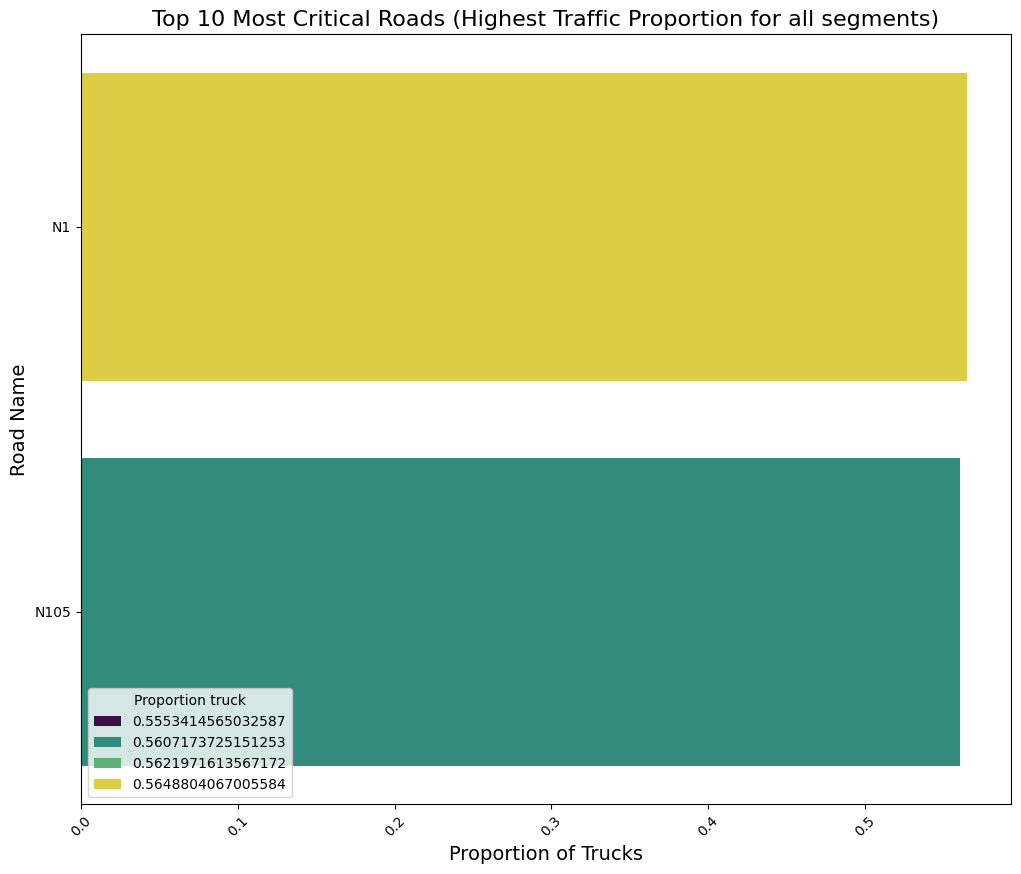

In [19]:
plt.figure(figsize=(12, 10))

# Use a sequential color palette
sequential_palette = sns.color_palette("viridis", as_cmap=True)

# Plot the bar plot
barplot = sns.barplot(x='Proportion truck', y='Road name', data=top_10_critical_roads, palette=sequential_palette, saturation=0.7, hue='Proportion truck', dodge=False)
plt.title('Top 10 Most Critical Roads (Highest Traffic Proportion for all segments)', fontsize=16)
plt.xlabel('Proportion of Trucks', fontsize=14)
plt.ylabel('Road Name', fontsize=14)

# Rotate the axis labels for better readability
plt.xticks(rotation=45)

plt.show()

## Correlation Matrix

In [46]:
top_10 = top_10_critical_roads[['Link number','Length Km','Proportion truck','Heavy truck','Medium truck','Small truck']]
top_10

,Link number,Length Km,Proportion truck,Heavy truck,Medium truck,Small truck
20,N1-21L,2.044,0.564880,615.0,11323.0,1618.0
21,N1-22L,2.173,0.564880,615.0,11323.0,1618.0
23,N1-24L,13.819,0.564880,615.0,11323.0,1618.0
22,N1-23L,14.296,0.564880,615.0,11323.0,1618.0
29,N1-30L,8.396,0.562197,830.0,10099.0,2182.0
97,N105-6,9.840,0.560717,320.0,3715.0,1155.0
96,N105-5,7.548,0.560717,320.0,3715.0,1155.0
95,N105-4,7.389,0.560717,320.0,3715.0,1155.0
25,N1-26L,1.382,0.555341,857.0,7353.0,1589.0
24,N1-25L,19.171,0.555341,857.0,7353.0,1589.0


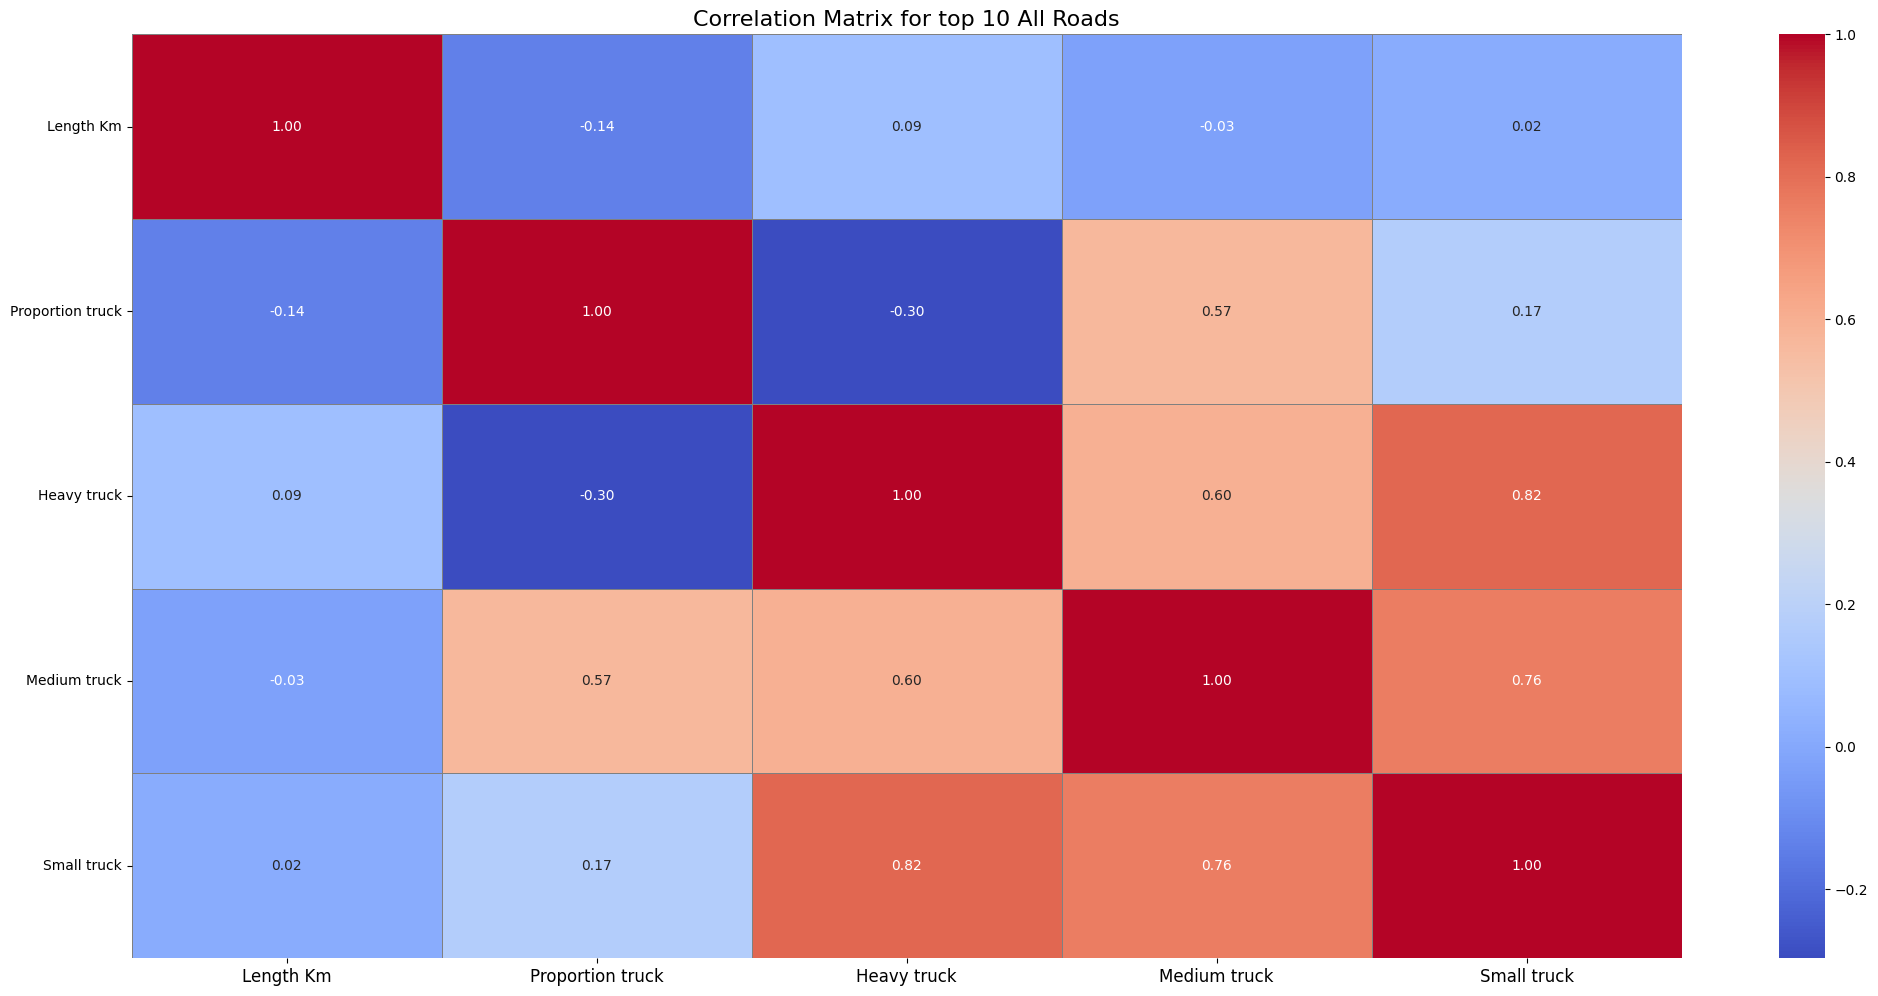

In [47]:
# Select only numeric columns for correlation calculation
numeric_columns = top_10.select_dtypes(include=np.number)

# Calculate the correlation matrix for numeric variables
correlation_matrix = numeric_columns.corr()

# Create a correlation heatmap
plt.figure(figsize=(25, 12))
heatmap = sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt='.2f', linewidths=0.5, linecolor='gray')
plt.title('Correlation Matrix for top 10 All Roads', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(rotation=0)  # Rotate the y-axis labels by 90 degrees
plt.show()


### Sorted Correlation Matrix

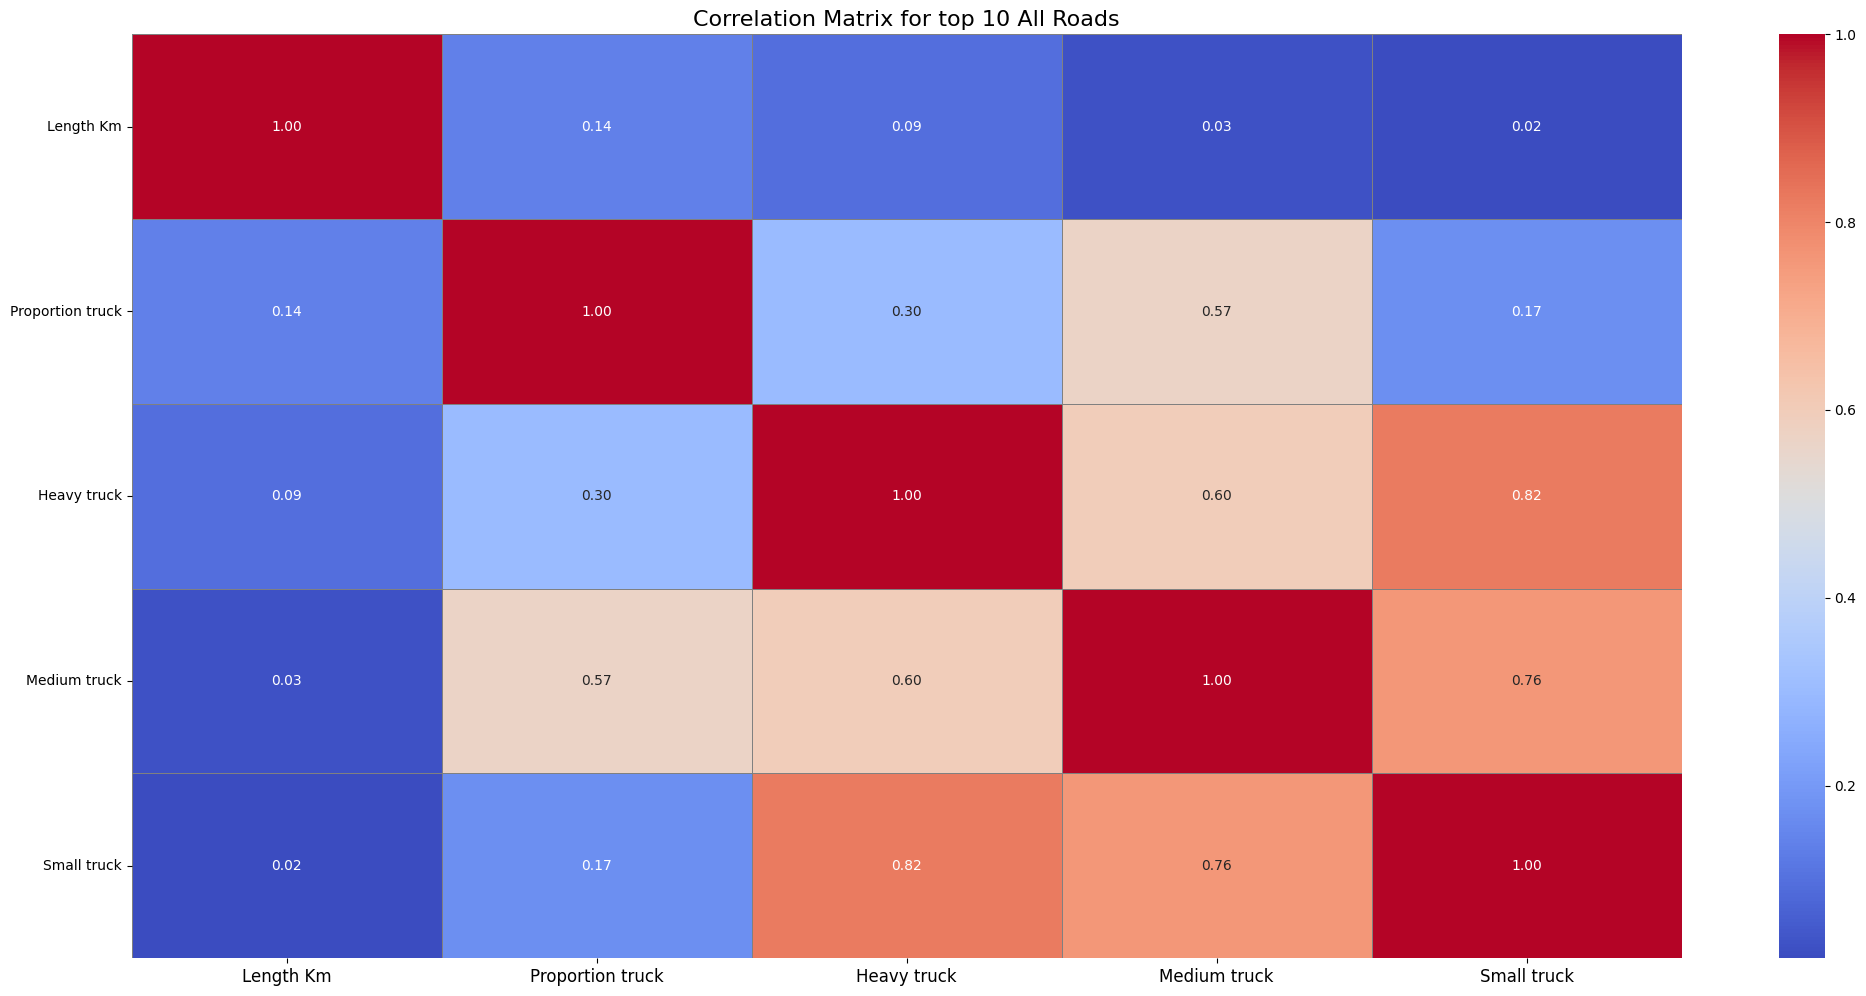

In [48]:
# Select only numeric columns for correlation calculation
numeric_columns = top_10.select_dtypes(include=np.number)

# Calculate the correlation matrix for numeric variables
correlation_matrix = numeric_columns.corr()

# Sort the correlation matrix values
correlation_matrix_sorted = correlation_matrix.abs().sort_values(by=correlation_matrix.columns.tolist(), axis=0, ascending=False)

# Create a correlation heatmap
plt.figure(figsize=(25, 12))
heatmap = sns.heatmap(correlation_matrix_sorted, cmap='coolwarm', annot=True, fmt='.2f', linewidths=0.5, linecolor='gray')
plt.title('Correlation Matrix for top 10 All Roads', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(rotation=0)  # Rotate the y-axis labels by 90 degrees
plt.show()
